In [6]:
# setup & dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

base_url="https://api.rawg.io/api/"

In [17]:
# File to Load (Remember to Change These)
game_path = "csvfiles/game_platform.csv"

# Read Purchasing File and store into Pandas data frame
platform_data = pd.read_csv(game_path)

In [22]:
# Remove index columns in csvfile
gaming_platforms = platform_data.drop(columns="Unnamed: 0")
# Remove platforms with no ratings
gaming_platforms = gaming_platforms.dropna(how="any")
gaming_platforms

,ID,name,number of games,rating,rating count,avg rating
0,1,PC,234754,773731.72,200138,3.865991
1,14,Web,88991,11128.27,2891,3.849281
2,4,iOS,66348,118242.73,30861,3.831461
3,5,Apple Macintosh,54948,275865.27,71977,3.832686
4,6,Linux,36595,208553.82,53930,3.867121
5,8,Android,30188,78477.04,20539,3.820879
6,7,Nintendo,15439,327508.25,81912,3.998294
7,2,PlayStation,15303,745720.60,190149,3.921770
8,3,Xbox,6676,635554.71,163632,3.884049


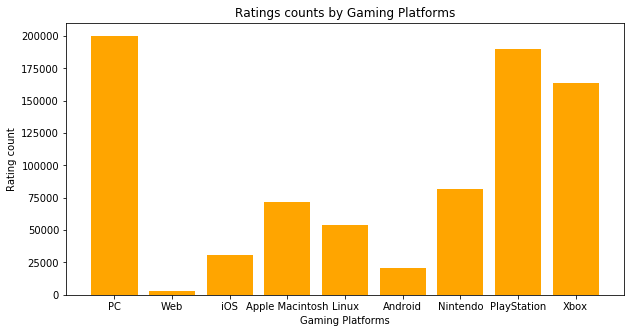

In [23]:
# Bar Graph for Rating Counts by Gaming Platforms
plt.figure(figsize=(10,5))
plt.bar(gaming_platforms["name"], gaming_platforms["rating count"], color='orange')
plt.title('Ratings counts by Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.ylabel('Rating count')

plt.savefig("figures/platforms_rating_count.png")

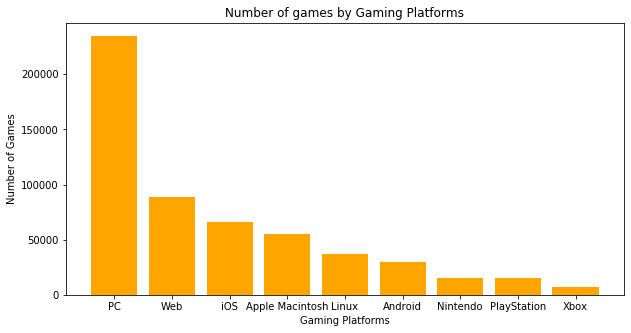

In [24]:
plt.figure(figsize=(10,5))
plt.bar(gaming_platforms["name"], gaming_platforms["number of games"], color='orange')
plt.title('Number of games by Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.ylabel('Number of Games')
plt.savefig("figures/total_games_platform.png")

In [16]:
games_path = "csvfiles/game.csv"
games_data = pd.read_csv(games_path)

In [17]:
games_data = games_data.drop(columns="Unnamed: 0")

,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month
0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5
1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1
2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10
3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.39,5,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5
4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,Ever Oasis,1,['Nintendo'],1,['Nintendo Store'],2,"['Action', 'RPG']","['role-playing', 'exclusive', 'true exclusive']",2017-06-23,3.88,4,8,78,"{'yet': 4, 'owned': 2, 'beaten': 9, 'toplay': ...",6
1176,FRAMED 2,2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",2,"['Adventure', 'Puzzle']","['Story', 'ship']",2017-06-14,3.78,4,9,89,"{'yet': 1, 'owned': 7, 'beaten': 10, 'toplay':...",6
1177,CATS: Crash Arena Turbo Stars (C.A.T.S.),2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",3,"['Casual', 'Arcade', 'Action']","['Asynchronous Multiplayer', 'Cute']",2017-04-19,3.79,4,14,78,"{'yet': 1, 'owned': 5, 'beaten': 3, 'dropped':...",4
1178,Far Cry 5 - Lost On Mars,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Adventure', 'Action']","['Mars', 'Space', 'Story', 'gun', 'Gravity', '...",2018-07-17,3.57,5,7,59,"{'yet': 2, 'owned': 5, 'beaten': 7, 'toplay': ...",7


In [43]:
# assign games data to new dataframe
type(games_data["platforms"][0])
plat_type_df = games_data
plat_type_df["s_platforms"]=""
plat_type_df.head()

,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month,s_platforms
0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5,
1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1,
2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10,
3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.39,5,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5,
4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11,


Platforms is stored as string, use for loop to remove unwanted characters

In [44]:
# Remove unwanted characters in platforms data

remove_chars = ['[', ']', "'"] 
new_platforms_str = list()

for i in test_df.index:
    
    #get len of string
    platform_len = len(plat_type_df.loc[i, "platforms"])
    platform_str = plat_type_df.loc[i, "platforms"]

    platform_str = ''.join(i for i in platform_str if not i in remove_chars) 
    
    new_platforms_str.append(platform_str)

    
plat_type_df["s_platforms"] = new_platforms_str
plat_type_df.head()

,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month,s_platforms
0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5,"PC, PlayStation, Xbox, Nintendo"
1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1,"PC, PlayStation, Xbox, iOS, Android, Apple Mac..."
2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10,"PC, PlayStation, Xbox"
3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.39,5,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5,"PC, PlayStation, Xbox, Nintendo"
4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11,"PC, PlayStation, Xbox"


In [45]:
# Remove columns data that is not needed
plat_type_df = plat_type_df.drop(columns=['number of stores', 'stores', 'number of genres', 'genres', 'tags', 'added', 'month', 'release date', 'platforms'])
plat_type_df.head()

,name,number of platforms,rating,max rating,rating count,metacritic score,s_platforms
0,The Witcher 3: Wild Hunt,4,4.67,5,3461,93,"PC, PlayStation, Xbox, Nintendo"
1,Life is Strange,9,4.10,5,2211,83,"PC, PlayStation, Xbox, iOS, Android, Apple Mac..."
2,Red Dead Redemption 2,3,4.56,5,2533,96,"PC, PlayStation, Xbox"
3,DOOM (2016),4,4.39,5,2171,85,"PC, PlayStation, Xbox, Nintendo"
4,Fallout 4,3,3.75,4,1984,84,"PC, PlayStation, Xbox"


In [46]:
# Split the string into list
plat_type_df["platforms_split"] = plat_type_df["s_platforms"].astype(str).str.split(",")
plat_type_df.head()

,name,number of platforms,rating,max rating,rating count,metacritic score,s_platforms,platforms_split
0,The Witcher 3: Wild Hunt,4,4.67,5,3461,93,"PC, PlayStation, Xbox, Nintendo","[PC, PlayStation, Xbox, Nintendo]"
1,Life is Strange,9,4.10,5,2211,83,"PC, PlayStation, Xbox, iOS, Android, Apple Mac...","[PC, PlayStation, Xbox, iOS, Android, App..."
2,Red Dead Redemption 2,3,4.56,5,2533,96,"PC, PlayStation, Xbox","[PC, PlayStation, Xbox]"
3,DOOM (2016),4,4.39,5,2171,85,"PC, PlayStation, Xbox, Nintendo","[PC, PlayStation, Xbox, Nintendo]"
4,Fallout 4,3,3.75,4,1984,84,"PC, PlayStation, Xbox","[PC, PlayStation, Xbox]"


In [47]:
# Convert platform list into dataframe
split_platforms_df = plat_type_df["platforms_split"].apply(pd.Series)
split_platforms_df.head()

,0,1,2,3,4,5,6,7
0,PC,PlayStation,Xbox,Nintendo,NaN,NaN,NaN,NaN
1,PC,PlayStation,Xbox,iOS,Android,Apple Macintosh,Linux,NaN
2,PC,PlayStation,Xbox,NaN,NaN,NaN,NaN,NaN
3,PC,PlayStation,Xbox,Nintendo,NaN,NaN,NaN,NaN
4,PC,PlayStation,Xbox,NaN,NaN,NaN,NaN,NaN


In [48]:
# Rename data frame columns
platform_columns = dict()

for column in split_platforms_df.columns:
  platform_columns[column] = f"platform_{int(column)+1}"

split_platforms_df = split_platforms_df.rename(columns = platform_columns)
split_platforms_df.head()

,platform_1,platform_2,platform_3,platform_4,platform_5,platform_6,platform_7,platform_8
0,PC,PlayStation,Xbox,Nintendo,NaN,NaN,NaN,NaN
1,PC,PlayStation,Xbox,iOS,Android,Apple Macintosh,Linux,NaN
2,PC,PlayStation,Xbox,NaN,NaN,NaN,NaN,NaN
3,PC,PlayStation,Xbox,Nintendo,NaN,NaN,NaN,NaN
4,PC,PlayStation,Xbox,NaN,NaN,NaN,NaN,NaN


In [49]:
# Join dataframe to the game name
split_platforms_df = plat_type_df[["name"]].join(split_platforms_df)

In [51]:
# Melt many coloumns into few columns
all_platforms_df = pd.melt(split_platforms_df, id_vars="name").sort_values(["name", "variable"])
all_platforms_df.head(10)

,name,variable,value
1019,0RBITALIS,platform_1,PC
2199,0RBITALIS,platform_2,Apple Macintosh
3379,0RBITALIS,platform_3,NaN
4559,0RBITALIS,platform_4,NaN
5739,0RBITALIS,platform_5,NaN
6919,0RBITALIS,platform_6,NaN
8099,0RBITALIS,platform_7,NaN
9279,0RBITALIS,platform_8,NaN
331,12 is Better Than 6,platform_1,PC
1511,12 is Better Than 6,platform_2,Apple Macintosh


In [52]:
# Drop column name to assign variable to game name
len(all_platforms_df)
all_platforms_df = all_platforms_df.drop(columns="variable")
all_platforms_df = all_platforms_df.dropna(how="any")
all_platforms_df.head()

,name,value
1019,0RBITALIS,PC
2199,0RBITALIS,Apple Macintosh
331,12 is Better Than 6,PC
1511,12 is Better Than 6,Apple Macintosh
2691,12 is Better Than 6,Linux


In [53]:
# Convert the platform values to sparse Matrix
plat_matrix_df = all_platforms_df[["name"]].join(pd.get_dummies(all_platforms_df["value"]))
plat_matrix_df.loc[plat_matrix_df["name"]== "The Witcher 3: Wild Hunt"]

,name,Android,Apple Macintosh,Linux,Nintendo,PlayStation,Web,Xbox,iOS,Nintendo,PC,PlayStation,Xbox,iOS
0,The Witcher 3: Wild Hunt,0,0,0,0,0,0,0,0,0,1,0,0,0
1180,The Witcher 3: Wild Hunt,0,0,0,0,1,0,0,0,0,0,0,0,0
2360,The Witcher 3: Wild Hunt,0,0,0,0,0,0,1,0,0,0,0,0,0
3540,The Witcher 3: Wild Hunt,0,0,0,1,0,0,0,0,0,0,0,0,0


In [55]:
# Aggregate total games per platforms
plat_matrix_df = plat_matrix_df.groupby("name").sum()
plat_matrix_df.head()

,Android,Apple Macintosh,Linux,Nintendo,PlayStation,Web,Xbox,iOS,Nintendo,PC,PlayStation,Xbox,iOS
name,,,,,,,,,,,,,
0RBITALIS,0,1,0,0,0,0,0,0,0,1,0,0,0
12 is Better Than 6,0,1,1,1,0,0,0,0,0,1,0,0,0
1979 Revolution: Black Friday,1,1,0,1,1,0,1,0,0,1,0,0,0
428: Shibuya Scramble,1,0,0,1,1,0,0,1,0,1,0,0,0
7th Sector,0,0,0,1,1,0,1,0,0,1,0,0,0


In [56]:
# Rename columns names for remove duplicate columns
plat_matrix_df = plat_matrix_df.rename(columns = {' Android': 'Andriod', ' Apple Macintosh':'Apple Macintosh'})
plat_matrix_df = plat_matrix_df.rename(columns = {' Nintendo': 'Nintendo', ' PlayStation':'PlayStation'})
plat_matrix_df = plat_matrix_df.rename(columns = {' Web': 'Web', ' Xbox':'Xbox', ' iOS': 'iOS' })
plat_matrix_df = plat_matrix_df.rename(columns = {' Linux': 'Linux'})
plat_matrix_df                                       

,Andriod,Apple Macintosh,Linux,Nintendo,PlayStation,Web,Xbox,iOS,Nintendo,PC,PlayStation,Xbox,iOS
name,,,,,,,,,,,,,
0RBITALIS,0,1,0,0,0,0,0,0,0,1,0,0,0
12 is Better Than 6,0,1,1,1,0,0,0,0,0,1,0,0,0
1979 Revolution: Black Friday,1,1,0,1,1,0,1,0,0,1,0,0,0
428: Shibuya Scramble,1,0,0,1,1,0,0,1,0,1,0,0,0
7th Sector,0,0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zero Escape: Zero Time Dilemma,0,0,0,1,1,0,0,0,0,1,0,0,0
Zombie Army Trilogy,0,0,0,1,1,0,1,0,0,1,0,0,0
Zombie Night Terror,1,1,1,1,0,0,0,1,0,1,0,0,0


In [57]:
# Combine duplicate platforms
plat_matrix_df = plat_matrix_df.groupby(plat_matrix_df.columns, axis=1).sum()
plat_matrix_df.head()

,Andriod,Apple Macintosh,Linux,Nintendo,PC,PlayStation,Web,Xbox,iOS
name,,,,,,,,,
0RBITALIS,0,1,0,0,1,0,0,0,0
12 is Better Than 6,0,1,1,1,1,0,0,0,0
1979 Revolution: Black Friday,1,1,0,1,1,1,0,1,0
428: Shibuya Scramble,1,0,0,1,1,1,0,0,1
7th Sector,0,0,0,1,1,1,0,1,0


Text(0, 0.5, 'Platforms')

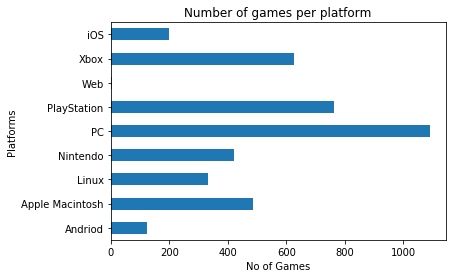

In [58]:
# Bar Chart for total number of games per platform
sum_plat = plat_matrix_df.sum()
sum_plat_chart = sum_plat.plot(kind="barh", title = "Number of games per platform")
sum_plat_chart.set_xlabel("No of Games")
sum_plat_chart.set_ylabel("Platforms")

In [60]:
# Merge dataframe with games dataframe 
combined_plat_df = pd.merge(plat_matrix_df, plat_type_df, on="name")
# Remove columns data that is not needed
combined_plat_df = combined_plat_df.drop(columns=['platforms_split'])
combined_plat_df.head()

,name,Andriod,Apple Macintosh,Linux,Nintendo,PC,PlayStation,Web,Xbox,iOS,number of platforms,rating,max rating,rating count,metacritic score,s_platforms
0,0RBITALIS,0,1,0,0,1,0,0,0,0,2,3.00,3,6,73,"PC, Apple Macintosh"
1,12 is Better Than 6,0,1,1,1,1,0,0,0,0,4,3.45,4,107,66,"PC, Apple Macintosh, Linux, Nintendo"
2,1979 Revolution: Black Friday,1,1,0,1,1,1,0,1,0,6,3.54,4,26,80,"PC, PlayStation, Xbox, Android, Apple Macintos..."
3,428: Shibuya Scramble,1,0,0,1,1,1,0,0,1,7,4.44,4,18,85,"PC, PlayStation, iOS, Android, Nintendo"
4,7th Sector,0,0,0,1,1,1,0,1,0,4,3.92,4,13,74,"PC, PlayStation, Xbox, Nintendo"


In [61]:
# Calculate total number of platforms
combined_plat_df["number of platforms"].max()
total_plat_df = combined_plat_df[["name", "Linux", "Andriod", "Apple Macintosh", "Nintendo", "PC", "PlayStation", "Web", "Xbox", "iOS"]]

# Get the total number of platforms for each game
total_platforms = total_plat_df.sum(axis=1)
total_platforms
combined_plat_df["total platforms"] = total_platforms
combined_plat_df.head()

,name,Andriod,Apple Macintosh,Linux,Nintendo,PC,PlayStation,Web,Xbox,iOS,number of platforms,rating,max rating,rating count,metacritic score,s_platforms,total platforms
0,0RBITALIS,0,1,0,0,1,0,0,0,0,2,3.00,3,6,73,"PC, Apple Macintosh",2
1,12 is Better Than 6,0,1,1,1,1,0,0,0,0,4,3.45,4,107,66,"PC, Apple Macintosh, Linux, Nintendo",4
2,1979 Revolution: Black Friday,1,1,0,1,1,1,0,1,0,6,3.54,4,26,80,"PC, PlayStation, Xbox, Android, Apple Macintos...",6
3,428: Shibuya Scramble,1,0,0,1,1,1,0,0,1,7,4.44,4,18,85,"PC, PlayStation, iOS, Android, Nintendo",5
4,7th Sector,0,0,0,1,1,1,0,1,0,4,3.92,4,13,74,"PC, PlayStation, Xbox, Nintendo",4


In [63]:
# Group rating score by number of platforms
platforms_total_df = combined_plat_df.groupby(combined_plat_df["rating"]).sum()
platforms_total_df = platforms_total_df[["Linux", "Andriod", "Apple Macintosh", "Nintendo", "PC", "PlayStation", "Web", "Xbox", "iOS"]]

In [64]:
# Make Rating a column instead of index
platforms_total_df["rating"] = platforms_total_df.index
platforms_total_df["rating"].astype(float)

# Reset index and reorder columns
platforms_total_df= platforms_total_df.reset_index(drop=True)
platforms_total_df = platforms_total_df[["rating", "Linux", "Andriod", "Apple Macintosh", "Nintendo", "PC", "PlayStation", "Web", "Xbox", "iOS"]]
platforms_total_df.head()

,rating,Linux,Andriod,Apple Macintosh,Nintendo,PC,PlayStation,Web,Xbox,iOS
0,1.29,0,0,0,0,1,0,0,0,0
1,1.50,0,0,0,0,1,0,0,0,0
2,1.67,0,0,1,1,1,0,0,0,0
3,1.68,0,1,1,0,1,0,0,0,1
4,1.73,0,0,1,0,1,1,0,1,0


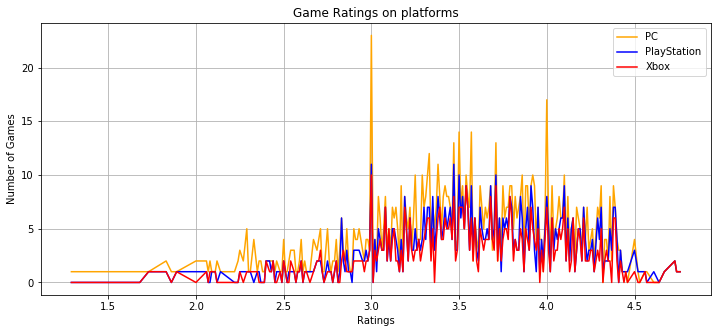

In [65]:
# Compare the ratings for the top 3 platforms
x_axis = platforms_total_df["rating"]
plt.figure(figsize=(12,5))
plt.plot(x_axis, platforms_total_df["PC"], color='orange', label="PC")
plt.plot(x_axis, platforms_total_df["PlayStation"], color='blue', label="PlayStation")
plt.plot(x_axis, platforms_total_df["Xbox"], color='red', label="Xbox")
# plt.plot(x_axis, platforms_total_df["Web"], color='green', label="Web")
# plt.plot(x_axis, platforms_total_df["Andriod"], color='purple', label="Andriod")

plt.title("Game Ratings on platforms")
plt.ylabel('Number of Games')
plt.xlabel('Ratings')
plt.legend(loc="best")

plt.grid()

plt.show()
# plt.savefig("Images/gamescountplatform.png")
                                                   
# plt.bar(gaming_platforms["name"], gaming_platforms["number of games"], color='orange')

Text(0.04, 0.5, 'Total Games')

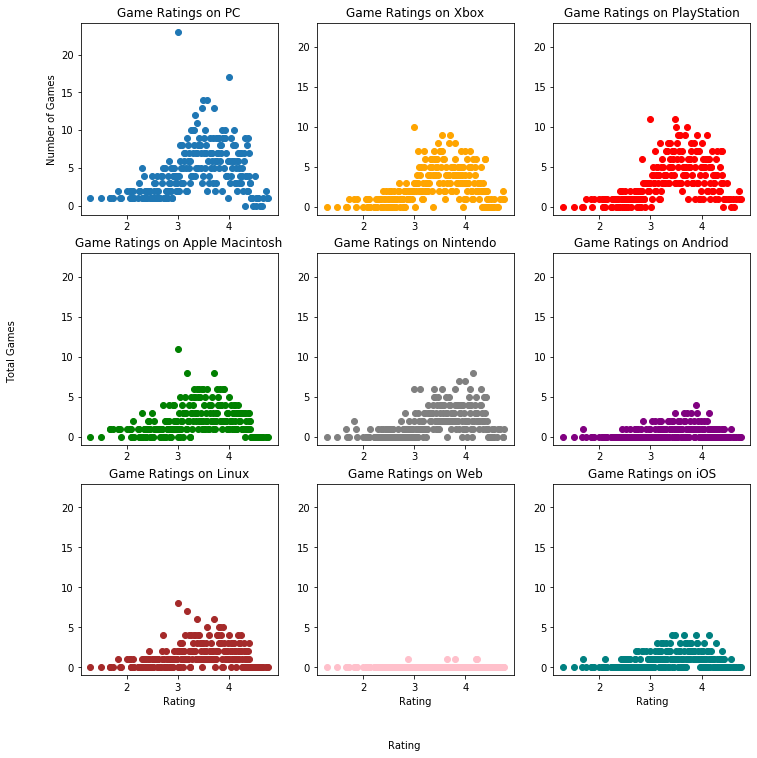

In [67]:
# Charts to analyse if any trends between games and ratings on each platform
fig1, axs = plt.subplots(3, 3, figsize=(12,12))
axs[0,0].scatter(platforms_total_df["rating"], platforms_total_df["PC"])
axs[0,1].scatter(platforms_total_df["rating"], platforms_total_df["Xbox"], color="orange")  
axs[0,2].scatter(platforms_total_df["rating"], platforms_total_df["PlayStation"], color="red") 
axs[1,0].scatter(platforms_total_df["rating"], platforms_total_df["Apple Macintosh"], color="green") 
axs[1,1].scatter(platforms_total_df["rating"], platforms_total_df["Nintendo"], color="grey") 
axs[1,2].scatter(platforms_total_df["rating"], platforms_total_df["Andriod"], color="purple") 
axs[2,0].scatter(platforms_total_df["rating"], platforms_total_df["Linux"], color="brown") 
axs[2,1].scatter(platforms_total_df["rating"], platforms_total_df["Web"], color="pink") 
axs[2,2].scatter(platforms_total_df["rating"], platforms_total_df["iOS"], color="teal") 

axs[0,0].set_title("Game Ratings on PC")
axs[0,0].set_ylabel("Number of Games")

axs[0,1].set_title("Game Ratings on Xbox")
# axs[0,1].set_xlabel("Rating")
axs[0,1].set_ylim([-1, 23])

axs[0,2].set_title("Game Ratings on PlayStation")
# axs[0,2].set_xlabel("Rating")
axs[0,2].set_ylim([-1, 23])

axs[1,0].set_title("Game Ratings on Apple Macintosh")
# axs[1,0].set_xlabel("Rating")
axs[1,0].set_ylim([-1, 23])

axs[1,1].set_title("Game Ratings on Nintendo")
# axs[1,1].set_xlabel("Rating")
axs[1,1].set_ylim([-1, 23])

axs[1,2].set_title("Game Ratings on Andriod")
# axs[1,2].set_xlabel("Rating")
axs[1,2].set_ylim([-1, 23])

axs[2,0].set_title("Game Ratings on Linux")
axs[2,0].set_xlabel("Rating")
axs[2,0].set_ylim([-1, 23])

axs[2,1].set_title("Game Ratings on Web")
axs[2,1].set_xlabel("Rating")
axs[2,1].set_ylim([-1, 23])

axs[2,2].set_title("Game Ratings on iOS")
axs[2,2].set_xlabel("Rating")
axs[2,2].set_ylim([-1, 23])

fig1.text(0.5, 0.04, 'Rating', ha='center')
fig1.text(0.04, 0.5, 'Total Games', va='center', rotation='vertical')

In [68]:
# Get the average number of platforms based on games ratings
average_platforms_df = combined_plat_df.groupby(["rating"]).mean()
average_platforms_df

,Andriod,Apple Macintosh,Linux,Nintendo,PC,PlayStation,Web,Xbox,iOS,number of platforms,max rating,rating count,metacritic score,total platforms
rating,,,,,,,,,,,,,,
1.29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,47.0,1.0
1.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,69.0,1.0
1.67,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,6.0,65.0,3.0
1.68,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,19.0,67.0,4.0
1.73,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,1.0,11.0,46.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.64,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,42.0,82.0,1.0
4.67,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,5.0,3461.0,93.0,4.0
4.73,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,5.0,181.5,86.5,3.0


In [69]:
# Make rating a column instead of index
average_platforms_df["rating"] = average_platforms_df.index

# Reset index and reorder columns
average_platforms_df = average_platforms_df.reset_index(drop=True)
platforms_rating_df = average_platforms_df[["rating","total platforms"]]

platforms_rating_df.head()

,rating,total platforms
0,1.29,1.0
1,1.50,1.0
2,1.67,3.0
3,1.68,4.0
4,1.73,4.0


Text(0, 0.5, 'Ratings score')

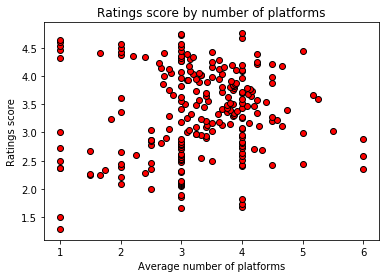

In [70]:
# Scatter plot for total platforms by ratings
plt.scatter(platforms_rating_df["total platforms"], platforms_rating_df["rating"],facecolors="red", edgecolors="black") 
plt.title("Ratings score by number of platforms")
plt.xlabel("Average number of platforms")
plt.ylabel("Ratings score")

In [71]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
rating = platforms_rating_df["rating"]
platforms = platforms_rating_df["total platforms"]
correlation = st.pearsonr(platforms, rating,)
print(f"The correlation ratings and number of platforms is {round(correlation[0],2)}")

The correlation ratings and number of platforms is 0.09


In [72]:
#Calculate the linear regresssion 
slope, intercept, rvalue, pvalue, stderr = st.linregress(platforms, rating)
print("slope", slope)
print("intercept", intercept)
print("coefficient", rvalue)

rating_platforms_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(rating_platforms_eq)
rating_platforms_regression = platforms * slope + intercept
rating_platforms_regression.head()

slope 0.07317698650162748
intercept 3.1016158952756934
coefficient 0.09133572663175715
y = 0.07x +3.1


0    3.174793
1    3.174793
2    3.321147
3    3.394324
4    3.394324
Name: total platforms, dtype: float64

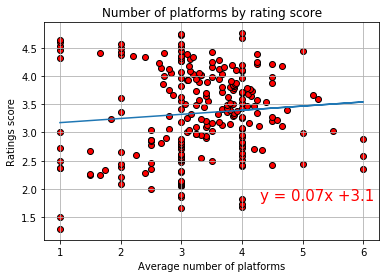

In [73]:
# Plot the linear model on top of scatter plot 
plt.scatter(platforms_rating_df["total platforms"], platforms_rating_df["rating"],facecolors="red", edgecolors="black") 
plt.plot(platforms, rating_platforms_regression)

plt.title("Number of platforms by rating score")
plt.xlabel("Average number of platforms")
plt.ylabel("Ratings score")
plt.grid()
plt.annotate(rating_platforms_eq,(4.3,1.8),fontsize=15,color="red")
# plt.xlim(14.5, 25.5)
# plt.ylim(33.5, 47)

plt.savefig("Images/gamingplatform_scatter.png")

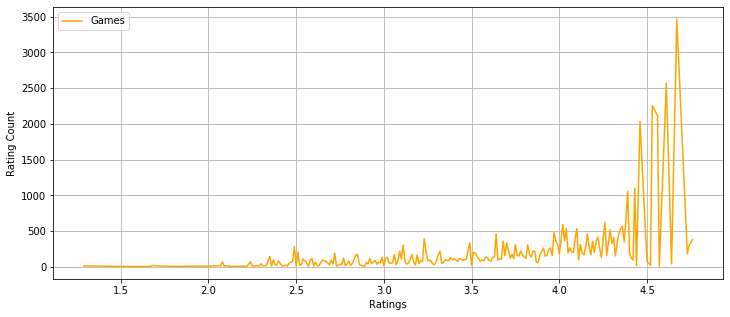

In [74]:
plt.figure(figsize=(12,5))
plt.plot(average_platforms_df["rating"], average_platforms_df["rating count"], color='orange', label="Games")
# plt.plot(platforms_total_df.index, platforms_total_df["rating count"], color='blue', label="PlayStation")
# plt.plot(platforms_total_df.index, platforms_total_df["Xbox"], color='red', label="Xbox")
# plt.plot(platforms_total_df.index, platforms_total_df["Web"], color='green', label="Web")

plt.ylabel('Rating Count')
plt.xlabel('Ratings')
plt.legend(loc="best")
plt.grid()

plt.show()